In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install joypy
!pip install squarify
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.mosaicplot import mosaic
from joypy import joyplot #!pip install joypy
import squarify # pip install squarify
import plotly.express as px # pip install plotly
from itertools import product

# Visualizing Proportions

- Mosaic Plot
- Treemaps
- Nested Pie Chart




In [16]:
filename="/content/drive/MyDrive/Data Science/data/Class-5/Growth_of_Coastal_Fleet_By_Type_of_Vessels_ason_31st_Dec_2014.csv"
data=pd.read_csv(filename)
data["Year"]=data["Year"].astype(str)
data = data.set_index(['Year',"Item"])
data=data.iloc[-75:,0:5]
data.columns=['Dry Cargo Liner','Dry Cargo Bulk Carrier', 'Oil Tanker', 'Passenger-cum-Cargo',
       'Off-shore Supply']
data["Total"]=data.sum(axis=1)
print(data)

                     Dry Cargo Liner  Dry Cargo Bulk Carrier  Oil Tanker  \
Year Item                                                                  
1990 No. of Vessels             32.0                     6.0        15.0   
     GRT                        25.0                   121.0       171.0   
     DWT                        45.0                   189.0       268.0   
1991 No. of Vessels             32.0                    10.0        18.0   
     GRT                        25.0                   127.0       193.0   
...                              ...                     ...         ...   
2013 GRT                       500.0                   248.0        75.0   
     DWT                       493.0                   368.0        91.0   
2014 No. of Vessels            549.0                    37.0        20.0   
     GRT                       520.0                   258.0        97.0   
     DWT                       512.0                   379.0       121.0   

           

# Nested Pie Chart

https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [17]:
data_total=data["Total"]

data_total=data_total.iloc[-18:].unstack()
print(data_total)
data_total_array=data_total.values.T#
data_total_array


Item     DWT     GRT  No. of Vessels
Year                                
2009   944.0   892.0           624.0
2010   954.0   925.0           662.0
2011   976.0   960.0           712.0
2012  1013.0   999.0           766.0
2013  1094.0  1044.0           793.0
2014  1154.0  1128.0           805.0


array([[ 944.,  954.,  976., 1013., 1094., 1154.],
       [ 892.,  925.,  960.,  999., 1044., 1128.],
       [ 624.,  662.,  712.,  766.,  793.,  805.]])

[ 944.  954.  976. 1013. 1094. 1154.  892.  925.  960.  999. 1044. 1128.
  624.  662.  712.  766.  793.  805.]
[6135. 5948. 4362.]


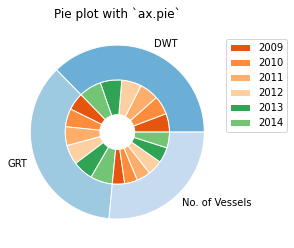

In [19]:
fig, ax = plt.subplots()

size = 0.4

cmap=plt.get_cmap("tab20c")
outer_colors = cmap([1,2,3])
inner_colors = cmap([4,5, 6, 7, 8,9])
#print(outer_colors)

outerlabels=data_total.columns.tolist()
innerlabels=data_total.index.tolist()
print(data_total_array.flatten())
print(data_total_array.sum(axis=1))

l2=ax.pie(data_total_array.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
l1=ax.pie(data_total_array.sum(axis=1), radius=1, colors=outer_colors, labels =outerlabels,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(innerlabels,loc=(1,0.5))
ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()


# Mosaic Plot

https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html

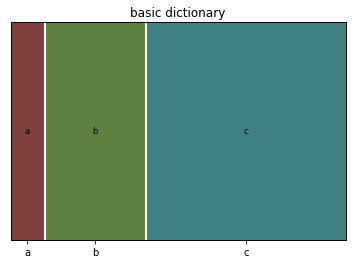

In [20]:
data_tmp= pd.Series({'a': 10, 'b': 30, 'c': 60})
mosaic(data_tmp, title='basic dictionary')
plt.show()

first  second
bar    one       0.726912
       two       0.489946
baz    one       0.256029
       two       0.161498
foo    one       0.382002
       two       0.615084
qux    one       0.651505
       two       0.490953
dtype: float64


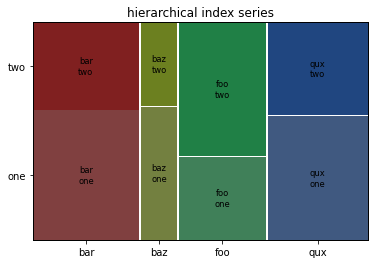

In [21]:
rand = np.random.random

tuples = list(product(['bar', 'baz', 'foo', 'qux'], ['one', 'two']))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
data_tmp= pd.Series(rand(8), index=index)
print(data_tmp)
mosaic(data_tmp, title='hierarchical index series')
plt.show()


   gender  pet
0    male  cat
1    male  dog
2    male  dog
3  female  cat
4  female  dog
5  female  cat


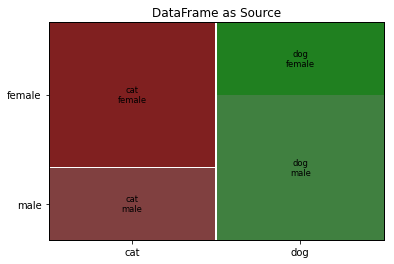

In [22]:
gender = ['male', 'male', 'male', 'female', 'female', 'female']
pet = ['cat', 'dog', 'dog', 'cat', 'dog', 'cat']
data_tmp= pd.DataFrame({'gender': gender, 'pet': pet})
print(data_tmp)
mosaic(data_tmp, ['pet', 'gender'], title='DataFrame as Source')
plt.show()

In [23]:
data_total=data["Dry Cargo Liner"]
data_total=data_total[-24:]
print(data_total.index)

MultiIndex([('2007', 'No. of Vessels'),
            ('2007',            'GRT'),
            ('2007',            'DWT'),
            ('2008', 'No. of Vessels'),
            ('2008',            'GRT'),
            ('2008',            'DWT'),
            ('2009', 'No. of Vessels'),
            ('2009',            'GRT'),
            ('2009',            'DWT'),
            ('2010', 'No. of Vessels'),
            ('2010',            'GRT'),
            ('2010',            'DWT'),
            ('2011', 'No. of Vessels'),
            ('2011',            'GRT'),
            ('2011',            'DWT'),
            ('2012', 'No. of Vessels'),
            ('2012',            'GRT'),
            ('2012',            'DWT'),
            ('2013', 'No. of Vessels'),
            ('2013',            'GRT'),
            ('2013',            'DWT'),
            ('2014', 'No. of Vessels'),
            ('2014',            'GRT'),
            ('2014',            'DWT')],
           names=['Year', 'Item'])


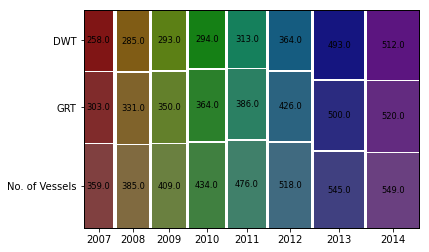

In [24]:
dic= data_total.to_dict()

labelizer = lambda k:dic[k]
#print(dic.keys()[0])
mosaic(data_total,labelizer =labelizer,gap=0.01)
#mosaic(data_total,gap=0.01)
plt.show()

In [ ]:
print(data_total)

# Tree Map
https://pypi.org/project/squarify/

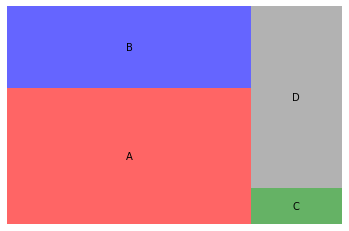

In [25]:
sizes=[50, 30, 5, 25]
label=["A", "B", "C", "D"]
color=['red','blue','green','grey']
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6 )
plt.axis("off")
plt.show()

In [26]:
#print(data)

#filename="/content/drive/MyDrive/Data Science/data/Class-5/Growth_of_Coastal_Fleet_By_Type_of_Vessels_ason_31st_Dec_2014.csv"
#data=pd.read_csv(filename).iloc[-75:,[0,1,-1]]
data_total=data.iloc[-75:,[-1]].reset_index()
data_total

,Year,Item,Total
0,1990,No. of Vessels,130.0
1,1990,GRT,424.0
2,1990,DWT,598.0
3,1991,No. of Vessels,136.0
4,1991,GRT,462.0
...,...,...,...
70,2013,GRT,1044.0
71,2013,DWT,1094.0
72,2014,No. of Vessels,805.0
73,2014,GRT,1128.0


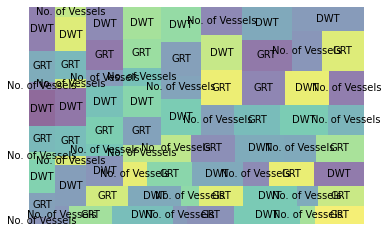

In [27]:
sizes=data_total["Total"].tolist()
label=data_total["Item"].tolist()
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.axis("off")
plt.show()

In [28]:
data_sub=data_total.groupby('Item')[['Total']].sum()
data_sub

,Total
Item,
DWT,20926.813
GRT,18117.000
No. of Vessels,10045.000


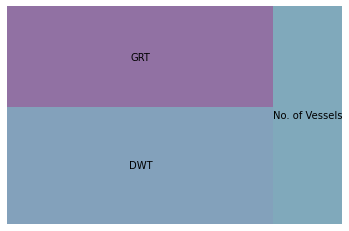

In [29]:
sizes=data_sub["Total"].tolist()
label=data_sub.index.tolist()
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.axis("off")
plt.show()

In [30]:
fig = px.treemap(data_total, path=["Year","Item"], values="Total")
fig.show()

In [31]:
fig = px.treemap(data_total, path=["Item","Year"], values="Total")
fig.show()

# Parallel Sets

https://plotly.com/python/parallel-categories-diagram/

In [ ]:
import plotly.express as px

df = px.data.tips()
df.columns=["total_bill", "tip", "gender", "smoker",  "day", "time", "size"]
print(df)
fig = px.parallel_categories(df,color='tip')
#fig = px.parallel_categories(df)

fig.show()

     total_bill   tip  gender smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
df[df["tip"]>9]

,total_bill,tip,gender,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [ ]:
#filename="/content/drive/MyDrive/Data Science/data/Class-5/Growth_of_Coastal_Fleet_By_Type_of_Vessels_ason_31st_Dec_2014.csv"
#data=pd.read_csv(filename).iloc[-75:,[0,1,2,3,4,5,6,-1]]

#data_sub.columns=["Year","Item",'Dry Cargo Liner','Dry Cargo Bulk Carrier', 'Oil Tanker', 'Passenger-cum-Cargo',
#       'Off-shore Supply',"Total"]
data_sub=data.iloc[-75:,[0,1,2,3,4,-1]].reset_index()
data_sub

,Year,Item,Dry Cargo Liner,Dry Cargo Bulk Carrier,Oil Tanker,Passenger-cum-Cargo,Off-shore Supply,Total
0,1990,No. of Vessels,32.0,6.0,15.0,14.0,63.0,130.0
1,1990,GRT,25.0,121.0,171.0,39.0,68.0,424.0
2,1990,DWT,45.0,189.0,268.0,20.0,76.0,598.0
3,1991,No. of Vessels,32.0,10.0,18.0,13.0,63.0,136.0
4,1991,GRT,25.0,127.0,193.0,49.0,68.0,462.0
...,...,...,...,...,...,...,...,...
70,2013,GRT,500.0,248.0,75.0,107.0,114.0,1044.0
71,2013,DWT,493.0,368.0,91.0,29.0,113.0,1094.0
72,2014,No. of Vessels,549.0,37.0,20.0,99.0,100.0,805.0
73,2014,GRT,520.0,258.0,97.0,143.0,110.0,1128.0


In [ ]:

fig = px.parallel_categories(data_sub,dimensions=['Year', 'Item'],color="Total")

fig.show()

In [ ]:
#data1 = data.set_index(['Year',"Item"])
data1=data.stack()
data1=data1.reset_index()
data1.columns=["Year","Item","Vessels","Measure"]
data1

,Year,Item,Vessels,Measure
0,1990,No. of Vessels,Dry Cargo Liner,32.0
1,1990,No. of Vessels,Dry Cargo Bulk Carrier,6.0
2,1990,No. of Vessels,Oil Tanker,15.0
3,1990,No. of Vessels,Passenger-cum-Cargo,14.0
4,1990,No. of Vessels,Off-shore Supply,63.0
...,...,...,...,...
445,2014,DWT,Dry Cargo Bulk Carrier,379.0
446,2014,DWT,Oil Tanker,121.0
447,2014,DWT,Passenger-cum-Cargo,34.0
448,2014,DWT,Off-shore Supply,108.0


In [ ]:
fig = px.parallel_categories(data1,dimensions=['Year', 'Item',"Vessels"],color="Measure")

fig.show()